In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.head())
print(test.head())

   id  age  gender   course  study_hours  class_attendance internet_access  \
0   0   21  female     b.sc         7.91              98.8              no   
1   1   18   other  diploma         4.95              94.8             yes   
2   2   20  female     b.sc         4.68              92.6             yes   
3   3   19    male     b.sc         2.00              49.5             yes   
4   4   23    male      bca         7.65              86.9             yes   

   sleep_hours sleep_quality   study_method facility_rating exam_difficulty  \
0          4.9       average  online videos             low            easy   
1          4.7          poor     self-study          medium        moderate   
2          5.8          poor       coaching            high        moderate   
3          8.3       average    group study            high        moderate   
4          9.6          good     self-study            high            easy   

   exam_score  
0        78.3  
1        46.7  
2       

In [5]:
#print(test.describe())
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB
None


📋 데이터 요약
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB
None

🔢 수치형 데이터 통계
                  id            age    study_hours  class_attendance  \
count 

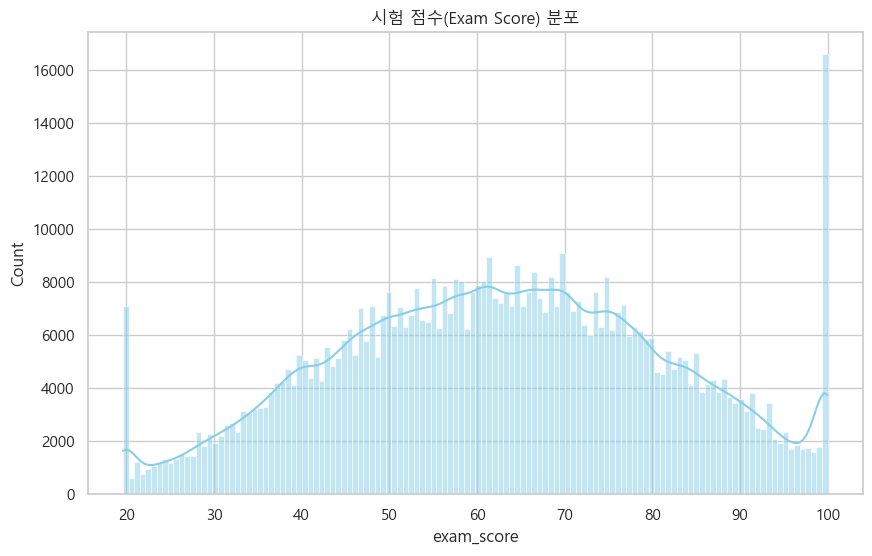

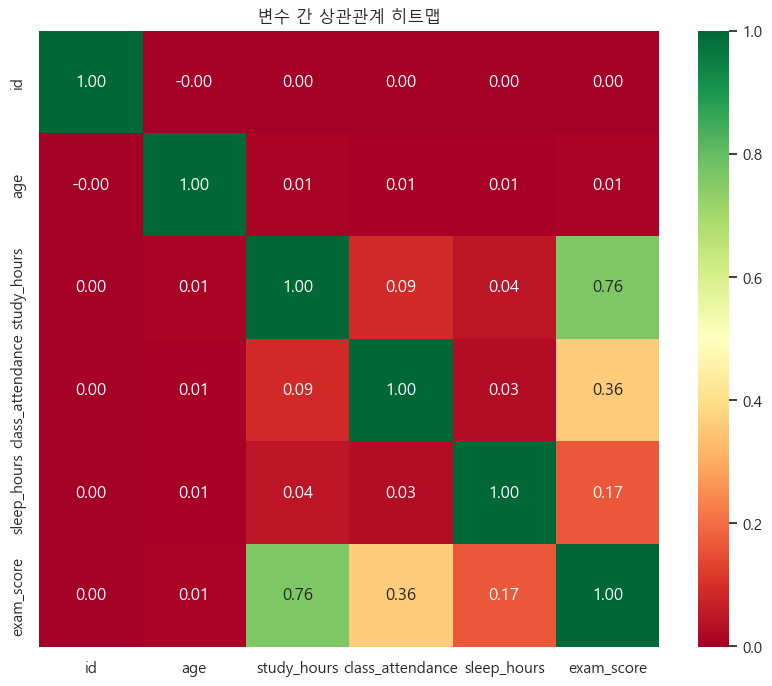

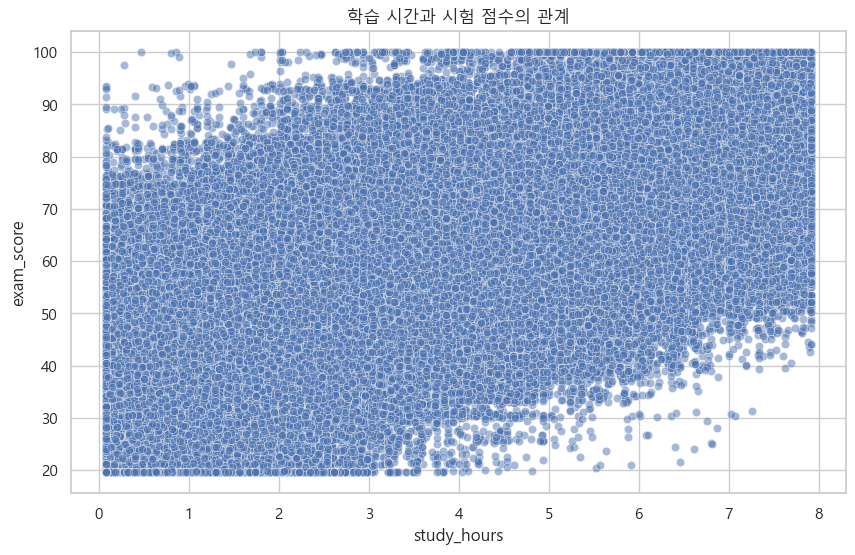

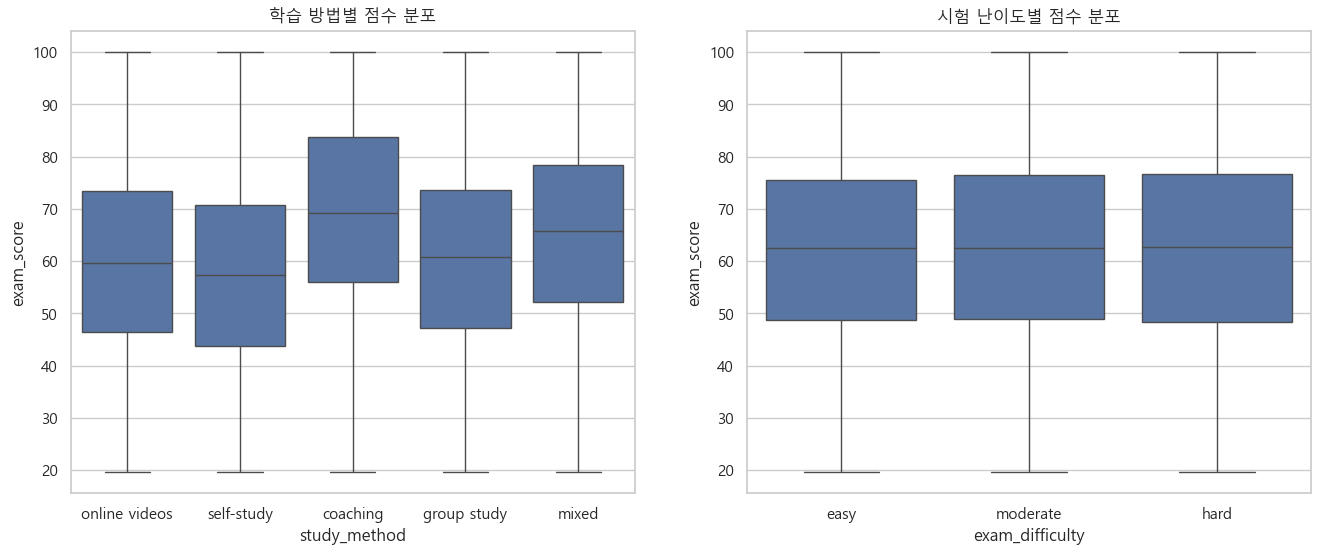

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로드
train = pd.read_csv('train.csv')

# 2. 데이터 기본 정보 확인
print("📋 데이터 요약")
print(train.info())
print("\n🔢 수치형 데이터 통계")
print(train.describe())

# 시각화 설정
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic' # 윈도우 한글 깨짐 방지

# 3. 타겟 변수(exam_score) 분포 확인
plt.figure(figsize=(10, 6))
sns.histplot(train['exam_score'], kde=True, color='skyblue')
plt.title('시험 점수(Exam Score) 분포')
plt.show()

# 4. 수치형 변수 간의 상관관계 히트맵
plt.figure(figsize=(10, 8))
corr = train.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt='.2f')
plt.title('변수 간 상관관계 히트맵')
plt.show()


# 5. 주요 요인 분석 (학습 시간 vs 시험 점수)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='study_hours', y='exam_score', alpha=0.5)
plt.title('학습 시간과 시험 점수의 관계')
plt.show()

# 6. 범주형 변수 분석 (학습 방법, 시험 난이도별 점수 차이)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x='study_method', y='exam_score', data=train, ax=axes[0])
axes[0].set_title('학습 방법별 점수 분포')

sns.boxplot(x='exam_difficulty', y='exam_score', data=train, ax=axes[1], 
            order=['easy', 'moderate', 'hard'])
axes[1].set_title('시험 난이도별 점수 분포')
plt.show()

In [2]:
import csv
from collections import defaultdict

def advanced_manual_eda(file_path):
    with open(file_path, mode='r', encoding='utf-8') as f:
        reader = csv.DictReader(f)
        data = list(reader)

    # 분석을 위한 저장소 설정
    method_scores = defaultdict(list)    # 학습 방법별 점수
    sleep_quality_scores = defaultdict(list) # 수면 질별 점수
    difficulty_efficiency = defaultdict(list) # 난이도별 학습시간 대비 점수
    
    for row in data:
        # 문자열 데이터를 숫자로 변환
        score = float(row['exam_score'])
        study_h = float(row['study_hours'])
        method = row['study_method']
        sleep_q = row['sleep_quality']
        diff = row['exam_difficulty']
        
        # 1. 학습 방법별 평균 점수 저장
        method_scores[method].append(score)
        
        # 2. 수면의 질별 평균 점수 저장
        sleep_quality_scores[sleep_q].append(score)
        
        # 3. 학습 효율성 (점수 / 학습시간) 계산
        if study_h > 0:
            efficiency = score / study_h
            difficulty_efficiency[diff].append(efficiency)

    print("🚀 [분석 1] 학습 방법별 성적 기여도 (평균)")
    for m, scores in method_scores.items():
        avg = sum(scores) / len(scores)
        print(f" - {m:15}: {avg:.2f}점 (대상: {len(scores)}명)")

    print("\n🌙 [분석 2] 수면의 질이 성적에 미치는 영향")
    for q in ['good', 'average', 'poor']:
        if q in sleep_quality_scores:
            avg = sum(sleep_quality_scores[q]) / len(sleep_quality_scores[q])
            print(f" - {q:10}: {avg:.2f}점")

    print("\n📉 [분석 3] 시험 난이도별 '공부 시간 1시간당' 점수 효율")
    for d in ['easy', 'moderate', 'hard']:
        if d in difficulty_efficiency:
            avg_eff = sum(difficulty_efficiency[d]) / len(difficulty_efficiency[d])
            print(f" - {d:10}: {avg_eff:.2f}점/시간")

# 실행
advanced_manual_eda('train.csv')

🚀 [분석 1] 학습 방법별 성적 기여도 (평균)
 - online videos  : 59.73점 (대상: 121077명)
 - self-study     : 57.70점 (대상: 131131명)
 - coaching       : 69.27점 (대상: 131697명)
 - group study    : 60.53점 (대상: 123009명)
 - mixed          : 65.10점 (대상: 123086명)

🌙 [분석 2] 수면의 질이 성적에 미치는 영향
 - good      : 67.88점
 - average   : 62.66점
 - poor      : 57.00점

📉 [분석 3] 시험 난이도별 '공부 시간 1시간당' 점수 효율
 - easy      : 37.33점/시간
 - moderate  : 38.12점/시간
 - hard      : 37.80점/시간


In [3]:
import csv
from collections import defaultdict

def deep_dive_analysis(file_path):
    with open(file_path, mode='r', encoding='utf-8') as f:
        data = list(csv.DictReader(f))

    # 1. 점수대별(Score Tier) 학생 분포 및 특징
    # 90점 이상(A), 70-90(B), 70미만(C)
    tiers = {'A(Excellent)': [], 'B(Good)': [], 'C(Normal)': []}
    
    # 2. 전공(Course)별 평균 공부 시간과 성적
    course_stats = defaultdict(lambda: {'score': 0, 'study': 0, 'count': 0})
    
    # 3. 인터넷 유무가 공부 효율에 미치는 영향
    internet_impact = defaultdict(lambda: {'score': 0, 'study': 0, 'count': 0})

    for row in data:
        score = float(row['exam_score'])
        study = float(row['study_hours'])
        course = row['course']
        net = row['internet_access']
        
        # 티어 분류
        if score >= 90: tiers['A(Excellent)'].append(study)
        elif score >= 70: tiers['B(Good)'].append(study)
        else: tiers['C(Normal)'].append(study)
            
        # 전공별 합계
        course_stats[course]['score'] += score
        course_stats[course]['study'] += study
        course_stats[course]['count'] += 1
        
        # 인터넷 유무별 합계
        internet_impact[net]['score'] += score
        internet_impact[net]['study'] += study
        internet_impact[net]['count'] += 1

    print("📌 [인사이트 1] 성적 상위권 학생들의 평균 공부 시간")
    for t, studies in tiers.items():
        avg_study = sum(studies)/len(studies) if studies else 0
        print(f" - {t:12}: 평균 {avg_study:.2f}시간 학습 (인원: {len(studies)}명)")

    print("\n🎓 [인사이트 2] 전공(Course)별 학습 가성비 (1시간당 점수)")
    for c, s in course_stats.items():
        avg_score = s['score'] / s['count']
        efficiency = s['score'] / s['study']
        print(f" - {c:8}: 평균 {avg_score:.1f}점 | 시간당 효율: {efficiency:.2f}")

    print("\n🌐 [인사이트 3] 인터넷 접근성이 성적에 미치는 실질적 차이")
    for n, s in internet_impact.items():
        avg_score = s['score'] / s['count']
        print(f" - Internet {n:3}: 평균 성적 {avg_score:.2f}점")

deep_dive_analysis('train.csv')

📌 [인사이트 1] 성적 상위권 학생들의 평균 공부 시간
 - A(Excellent): 평균 6.90시간 학습 (인원: 51274명)
 - B(Good)     : 평균 5.75시간 학습 (인원: 175662명)
 - C(Normal)   : 평균 2.87시간 학습 (인원: 403064명)

🎓 [인사이트 2] 전공(Course)별 학습 가성비 (1시간당 점수)
 - b.sc    : 평균 62.3점 | 시간당 효율: 15.47
 - diploma : 평균 62.4점 | 시간당 효율: 15.79
 - bca     : 평균 62.6점 | 시간당 효율: 15.58
 - b.com   : 평균 62.5점 | 시간당 효율: 15.62
 - ba      : 평균 61.9점 | 시간당 효율: 15.78
 - bba     : 평균 63.2점 | 시간당 효율: 15.62
 - b.tech  : 평균 62.5점 | 시간당 효율: 15.62

🌐 [인사이트 3] 인터넷 접근성이 성적에 미치는 실질적 차이
 - Internet no : 평균 성적 62.48점
 - Internet yes: 평균 성적 62.51점


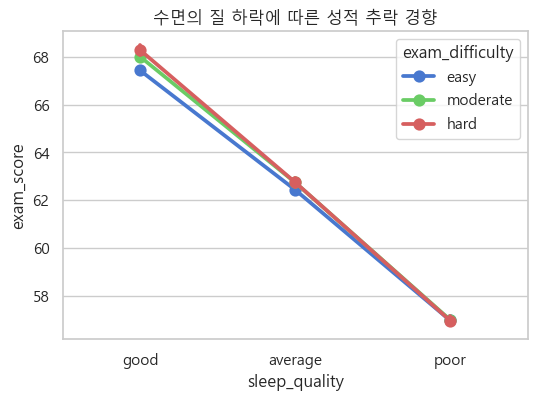

C:\Users\jinmg\AppData\Local\Temp\ipykernel_14948\3605432890.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train, x='exam_score', y='study_method', order=method_order, palette='coolwarm')


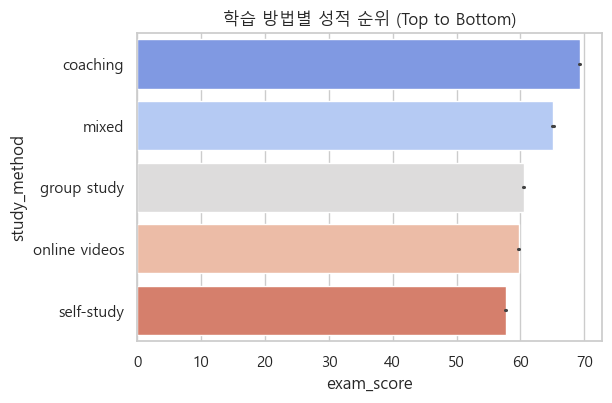

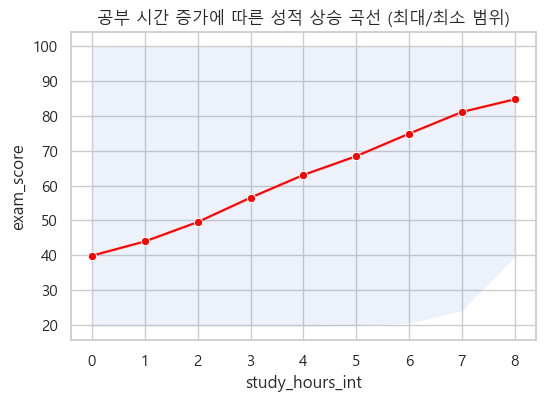

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로드
train = pd.read_csv('train.csv')

# 가독성을 위한 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.set_context("notebook") # 글씨 크기 변경
plt.style.use('seaborn-v0_8-muted')

# 2. [도표 1] "공부 시간보다 무서운 수면의 질" 
# 수면의 질에 따른 점수 차이를 아주 명확하게 보여주는 포인트 플롯
plt.figure(figsize=(6,4))
sns.pointplot(data=train, x='sleep_quality', y='exam_score', hue='exam_difficulty', 
              order=['good', 'average', 'poor'])
plt.title('수면의 질 하락에 따른 성적 추락 경향')
plt.show()


# 3. [도표 2] "가장 효율적인 공부법은?"
# 각 공부법의 평균 점수를 가로형 바 차트로 그려서 순위를 명확히 합니다.
plt.figure(figsize=(6,4))
method_order = train.groupby('study_method')['exam_score'].mean().sort_values(ascending=False).index
sns.barplot(data=train, x='exam_score', y='study_method', order=method_order, palette='coolwarm')
plt.title('학습 방법별 성적 순위 (Top to Bottom)')
plt.show()

# 4. [도표 3] "공부 시간대별 점수 정체 구간"
# 공부 시간을 정수로 반올림해서 각 시간대별 점수 분포를 봅니다.
train['study_hours_int'] = train['study_hours'].round()
plt.figure(figsize=(6,4))
sns.lineplot(data=train, x='study_hours_int', y='exam_score', color='red', marker='o')
plt.fill_between(train.groupby('study_hours_int')['exam_score'].mean().index, 
                 train.groupby('study_hours_int')['exam_score'].min(), 
                 train.groupby('study_hours_int')['exam_score'].max(), alpha=0.1)
plt.title('공부 시간 증가에 따른 성적 상승 곡선 (최대/최소 범위)')
plt.show()

In [14]:
import pandas as pd
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

# 1. 데이터 로드
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# [핵심] 너무 많으면 10만 개만 샘플링 (학습 속도 6배 향상)
if len(train) > 100000:
    train_sample = train.sample(n=100000, random_state=42)
else:
    train_sample = train

# 2. 태스크 및 역할 설정
# 성적(score)은 숫자이므로 'reg'(Regression) 태스크를 사용합니다.
task = Task('reg', metric='mae') 

roles = {
    'target': 'exam_score',
    'drop': ['id']
}

# 3. 모델 설정 (초고속 버전)
automl = TabularAutoML(
    task=task,
    timeout=60*3,       # 시간 조절
    cpu_limit=4,       # CPU 코어 활용
    general_params={
        'use_algos': [['lgb']] # 가장 빠른 LightGBM만 사용!
    },
    reader_params={'cv': 3, 'random_state': 42} # 교차 검증 횟수 축소 (5 -> 3)
)

print("🚀 초고속 학습 시작...")
automl.fit_predict(train_sample, roles=roles, verbose=1)

# 4. 테스트 데이터 예측
test_pred = automl.predict(test)
test['predicted_score'] = test_pred.data[:, 0]

# 5. 결과 확인
print("\n✅ 예측 완료!")
print(test[['id', 'study_hours', 'predicted_score']].head())

# 결과 저장
test[['id', 'predicted_score']].to_csv('fast_exam_predictions.csv', index=False)

🚀 초고속 학습 시작...
[15:46:34] Stdout logging level is INFO.
[15:46:34] Task: reg

[15:46:34] Start automl preset with listed constraints:
[15:46:34] - time: 180.00 seconds
[15:46:34] - CPU: 4 cores
[15:46:34] - memory: 16 GB

[15:46:34] Train data shape: (100000, 13)

[15:46:50] Layer 1 train process start. Time left 164.71 secs
[15:46:53] Selector_LightGBM fitting and predicting completed
[15:46:54] Start fitting Lvl_0_Pipe_0_Mod_0_LightGBM ...
[15:47:05] Fitting Lvl_0_Pipe_0_Mod_0_LightGBM finished. score = -8.428895462109834
[15:47:05] Lvl_0_Pipe_0_Mod_0_LightGBM fitting and predicting completed
[15:47:05] Time left 149.82 secs

[15:47:05] Layer 1 training completed.

[15:47:05] Automl preset training completed in 30.21 seconds

[15:47:05] Model description:
Final prediction for new objects (level 0) = 
	 1.00000 * (3 averaged models Lvl_0_Pipe_0_Mod_0_LightGBM) 


✅ 예측 완료!
       id  study_hours  predicted_score
0  630000         6.85        75.975845
1  630001         6.61        70.6

In [ ]:
import pandas as pd

# 데이터 로드
df = pd.read_csv('train.csv')

# 1. 전공별 최고의 학습 방법 궁합 찾기
course_method = df.groupby(['course', 'study_method'])['exam_score'].mean().unstack()
print("🏆 전공별 학습 방법 궁합 (평균 점수)")
print(course_method) 
#print(course_method.idxmax(axis=1)# 각 전공별 점수가 가장 높은 학습방법 출력

# 2. 시설 등급에 따른 출석률 및 성적 변화
facility_impact = df.groupby('facility_rating')[['class_attendance', 'exam_score']].mean()
print("\n🏢 시설 등급의 영향력")
print(facility_impact)

# 3. '잠 포기형' vs '숙면형' 학생 비중 및 성적
df['sleep_group'] = pd.cut(df['sleep_hours'], bins=[0, 5, 8, 12], labels=['부족', '적정', '과다'])
sleep_analysis = df.groupby('sleep_group')['exam_score'].agg(['mean', 'count'])
print("\n🌙 수면 그룹별 성적 요약")
print(sleep_analysis)

🏆 전공별 학습 방법 궁합 (평균 점수)


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U1')) -> None